# GOODS-S SED-fitting subsamples

In this notebook the different physical parameters retrieved after performing the SED fitting using CIGALE for different subsamples are analyzed.

It is important to know if the distribution of the SFH, Stellar Mass, etc ... is affected by our selection taking into account that maybe some fluxes may be not have the best quality. Selections are performed first cutting data using any emission line or combiantion and then on the photometric data. This assumes that if the emission line is detected above a given SNR then the photometry should not be that bad. 

In [64]:
# Regular packages

import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, Column
import os
from matplotlib.legend_handler import HandlerPathCollection
import pandas as pd

%matplotlib inline

In [65]:
# COSMOS
cosmos_ha       = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
                     'COSMOS-GOODSS-subsamples/results/COSMOS_Ha_SED.fits', format = 'fits') 
cosmos_hb       = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
                     'COSMOS-GOODSS-subsamples/results/COSMOS_Hb_SED.fits', format = 'fits') 
cosmos_OII      = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
                     'COSMOS-GOODSS-subsamples/results/COSMOS_OII_SED.fits', format = 'fits') 
cosmos_OIII     = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
                     'COSMOS-GOODSS-subsamples/results/COSMOS_OIII_SED.fits', format = 'fits') 
cosmos_hahb     = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
                     'COSMOS-GOODSS-subsamples/results/COSMOS_HaHb_SED.fits', format = 'fits') 
cosmos_haOIII   = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
                     'COSMOS-GOODSS-subsamples/results/COSMOS_HaOIII_SED.fits', format = 'fits') 
cosmos_hahbOIII = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
                     'COSMOS-GOODSS-subsamples/results/COSMOS_HaHbOIII_SED.fits', format = 'fits') 

# GOODS-S
goodss_ha = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
                     'COSMOS-GOODSS-subsamples/results/GOODSS_Ha_SED.fits', format = 'fits')

goodss_ha_new = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
                     'COSMOS-GOODSS-subsamples/results/GOODSSnew_Ha_SED.fits', format = 'fits')

In [66]:
#===================================================================================================================
'''Functions'''
#===================================================================================================================

#Main- relationSequence
#Schreiber et al., 2015
#https://www.aanda.org/articles/aa/pdf/2015/03/aa25017-14.pdf
def MS(z, M_star):
    r  = np.log10(1.0 + z)
    m  = np.log10(M_star / 10**9) #In M_sun^-1
    m0 = 0.5; a0 = 1.5; a1 = 0.3; m1 = 0.36; a2 = 2.5
    return (m - m0 + a0*r - a1*(np.maximum(0.0, m-m1-a2*r))**2)

#Relative uncertainty for division
#Data reduction and error analysis for physical sciences
#Phillip R. Bevignton and D. Keith Robinson
def Rel_uncertainty(Value, X, Y, X_err, Y_err):
    return np.sqrt(Value**2 * ((X_err**2/X**2) + (Y_err**2/Y**2)) )

#Attenuation for a given line
#DBPL-like models
def A_line(A_v, Lambda, Lambda_v, n):
    return (A_v * (Lambda/Lambda_v)**n)

#Error in attenuation for a given line
#DBPL-like models
def Attenuation_DBPL_err(A_halpha, L, Lv, n, n_err, Av, Av_err):
    return (A_halpha)**2 * ((Av_err**2/Av**2) + (n**2*(np.log(L/Lv))**2*n_err**2)/(L/Lv)**(2*n))

#Power law exponent between two wavelengths (l and v)
def power_law_exponent(A_l, A_v, l, v):
    return (np.log(A_l/A_v) / np.log(l/v))

#Equation 10. chevallard et al., 2013
#Power law slope of the ISM in terms of Av (tau_v = 0.921 A_v)
def chevallard(A):
    return -(2.8 / (1.0 + 3.0*np.sqrt(0.921*A)))

In [71]:
len(cosmos_OII)

232

In [73]:
files = [cosmos_ha, cosmos_hb, cosmos_OII, cosmos_OIII, cosmos_hahb, cosmos_haOIII, cosmos_hahbOIII]
for i in range(len(files)):
    print(len(files[i]))

1187
133
232
435
27
126
24


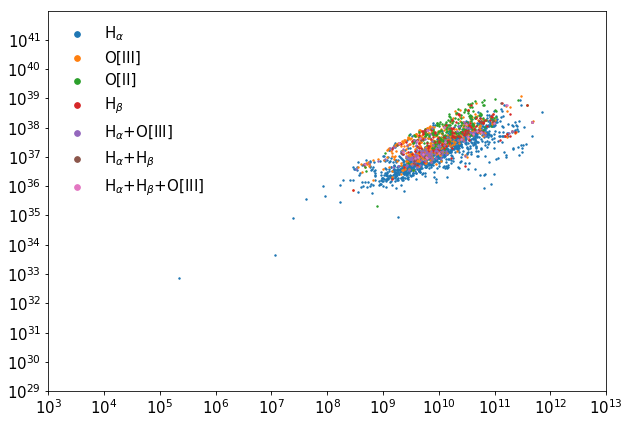

In [87]:
plt.figure(figsize = (10,7))
plt.scatter(cosmos_ha['bayes.stellar.m_star'], cosmos_ha['bayes.dust.luminosity'], s = 2, label = r'H$_\alpha$')
plt.scatter(cosmos_OIII['bayes.stellar.m_star'], cosmos_OIII['bayes.dust.luminosity'], s = 2, label = r'O[III]')
plt.scatter(cosmos_OII['bayes.stellar.m_star'], cosmos_OII['bayes.dust.luminosity'], s = 2, label = r'O[II]')
plt.scatter(cosmos_hb['bayes.stellar.m_star'], cosmos_hb['bayes.dust.luminosity'], s = 2, label = r'H$_\beta$')
plt.scatter(cosmos_haOIII['bayes.stellar.m_star'], cosmos_haOIII['bayes.dust.luminosity'], s = 2, label = r'H$_\alpha$+O[III]')
plt.scatter(cosmos_hahb['bayes.stellar.m_star'], cosmos_hahb['bayes.dust.luminosity'], s = 2, label = r'H$_\alpha$+H$_\beta$')
plt.scatter(cosmos_hahbOIII['bayes.stellar.m_star'], cosmos_hahbOIII['bayes.dust.luminosity'], s = 2, label = r'H$_\alpha$+H$_\beta$+O[III]')
# plt.scatter(goodss_ha['bayes.stellar.m_star'], goodss_ha['bayes.dust.luminosity'], s = 4)
# plt.scatter(goodss_ha_new['bayes.stellar.m_star'], goodss_ha_new['bayes.dust.luminosity'], s = 4)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlim(1e3, 1e13)
plt.ylim(1e29, 1e42)
# plt.xlim(1e9, 1e12)
# plt.ylim(1e36, 1e39)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 4, loc = 'upper left')

In [125]:
cosmos_ha       = cosmos_ha[cosmos_ha['best.sfh.sfr'] > 0]
cosmos_hb       = cosmos_hb[cosmos_hb['best.sfh.sfr'] > 0]
cosmos_OII      = cosmos_OII[cosmos_OII['best.sfh.sfr'] > 0]
cosmos_OIII     = cosmos_OIII[cosmos_OIII['best.sfh.sfr'] > 0]
cosmos_hahb     = cosmos_hahb[cosmos_hahb['best.sfh.sfr'] > 0]
cosmos_haOIII   = cosmos_haOIII[cosmos_haOIII['best.sfh.sfr'] > 0]
cosmos_hahbOIII = cosmos_hahbOIII[cosmos_hahbOIII['best.sfh.sfr'] > 0]

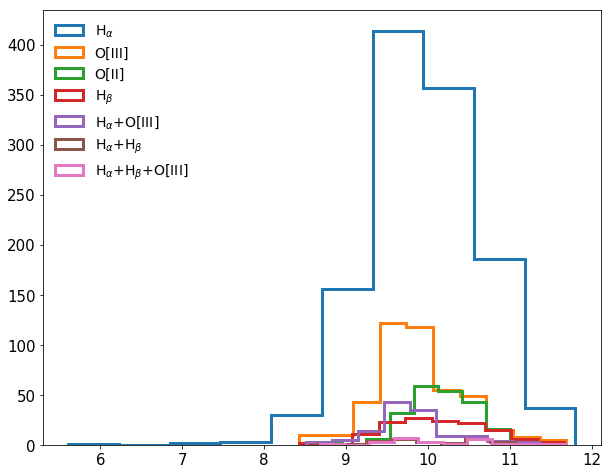

In [134]:
plt.figure(figsize = (10,8))
plt.hist(np.log10(cosmos_ha['best.stellar.m_star']), histtype = 'step', lw = 3, label = r'H$_\alpha$')
plt.hist(np.log10(cosmos_OIII['best.stellar.m_star']), histtype = 'step', lw = 3, label = r'O[III]')
plt.hist(np.log10(cosmos_OII['best.stellar.m_star']), histtype = 'step', lw = 3, label = r'O[II]')
plt.hist(np.log10(cosmos_hb['best.stellar.m_star']), histtype = 'step', lw = 3, label = r'H$_\beta$')
plt.hist(np.log10(cosmos_haOIII['best.stellar.m_star']), histtype = 'step', lw = 3, label = r'H$_\alpha$+O[III]')
plt.hist(np.log10(cosmos_hahb['best.stellar.m_star']), histtype = 'step', lw = 3, label = r'H$_\alpha$+H$_\beta$')
plt.hist(np.log10(cosmos_hahbOIII['best.stellar.m_star']), histtype = 'step', lw = 3, label = r'H$_\alpha$+H$_\beta$+O[III]')
# plt.plot(M_star, 10**MS(0.01, M_star), linestyle = '--', linewidth = 3.0, c = 'k')
# plt.plot(M_star, 10**MS(5 ,M_star), linestyle = '--', linewidth = 3.0, c = 'k')
# plt.xscale('symlog')
# plt.yscale('symlog')
# plt.xlim(1e7, 1e13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 14}, markerscale = 4, loc = 'upper left')

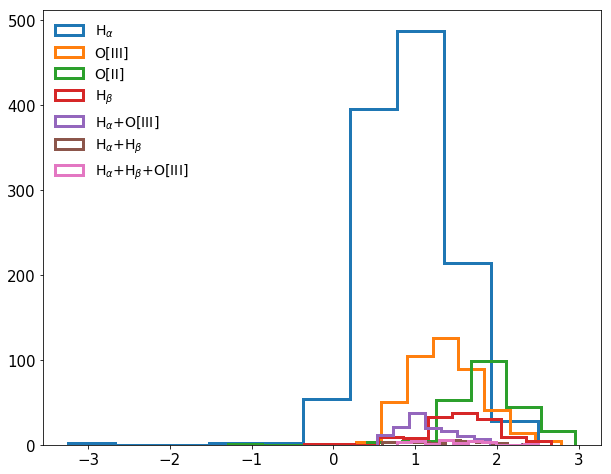

In [132]:
plt.figure(figsize = (10,8))
plt.hist(np.log10(cosmos_ha['best.sfh.sfr']), histtype = 'step', lw = 3, label = r'H$_\alpha$')
plt.hist(np.log10(cosmos_OIII['best.sfh.sfr']), histtype = 'step', lw = 3, label = r'O[III]')
plt.hist(np.log10(cosmos_OII['best.sfh.sfr']), histtype = 'step', lw = 3, label = r'O[II]')
plt.hist(np.log10(cosmos_hb['best.sfh.sfr']), histtype = 'step', lw = 3, label = r'H$_\beta$')
plt.hist(np.log10(cosmos_haOIII['best.sfh.sfr']), histtype = 'step', lw = 3, label = r'H$_\alpha$+O[III]')
plt.hist(np.log10(cosmos_hahb['best.sfh.sfr']), histtype = 'step', lw = 3, label = r'H$_\alpha$+H$_\beta$')
plt.hist(np.log10(cosmos_hahbOIII['best.sfh.sfr']), histtype = 'step', lw = 3, label = r'H$_\alpha$+H$_\beta$+O[III]')
# plt.plot(M_star, 10**MS(0.01, M_star), linestyle = '--', linewidth = 3.0, c = 'k')
# plt.plot(M_star, 10**MS(5 ,M_star), linestyle = '--', linewidth = 3.0, c = 'k')
# plt.xscale('symlog')
# plt.yscale('symlog')
# plt.xlim(1e7, 1e13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 14}, markerscale = 4, loc = 'upper left')

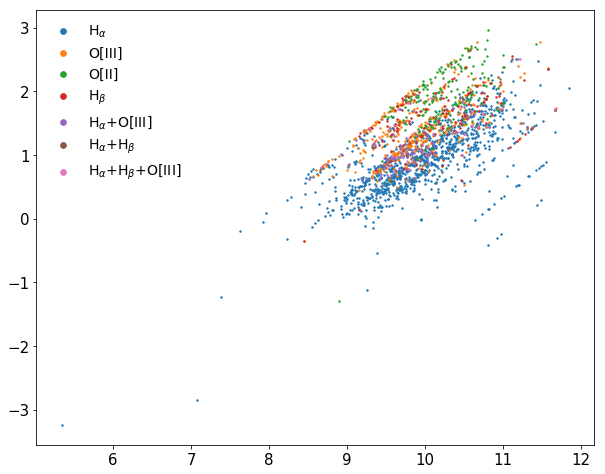

In [126]:
plt.figure(figsize = (10,8))
plt.scatter(np.log10(cosmos_ha['bayes.stellar.m_star']), np.log10(cosmos_ha['best.sfh.sfr']), s = 2, label = r'H$_\alpha$')
plt.scatter(np.log10(cosmos_OIII['bayes.stellar.m_star']), np.log10(cosmos_OIII['best.sfh.sfr']), s = 2, label = r'O[III]')
plt.scatter(np.log10(cosmos_OII['bayes.stellar.m_star']), np.log10(cosmos_OII['best.sfh.sfr']), s = 2, label = r'O[II]')
plt.scatter(np.log10(cosmos_hb['bayes.stellar.m_star']), np.log10(cosmos_hb['best.sfh.sfr']), s = 2, label = r'H$_\beta$')
plt.scatter(np.log10(cosmos_haOIII['bayes.stellar.m_star']), np.log10(cosmos_haOIII['best.sfh.sfr']), s = 2, label = r'H$_\alpha$+O[III]')
plt.scatter(np.log10(cosmos_hahb['bayes.stellar.m_star']), np.log10(cosmos_hahb['best.sfh.sfr']), s = 2, label = r'H$_\alpha$+H$_\beta$')
plt.scatter(np.log10(cosmos_hahbOIII['bayes.stellar.m_star']), np.log10(cosmos_hahbOIII['best.sfh.sfr']), s = 2, label = r'H$_\alpha$+H$_\beta$+O[III]')
# plt.plot(M_star, 10**MS(0.01, M_star), linestyle = '--', linewidth = 3.0, c = 'k')
# plt.plot(M_star, 10**MS(5 ,M_star), linestyle = '--', linewidth = 3.0, c = 'k')
# plt.xscale('symlog')
# plt.yscale('symlog')
# plt.xlim(1e7, 1e13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 14}, markerscale = 4, loc = 'upper left')

/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


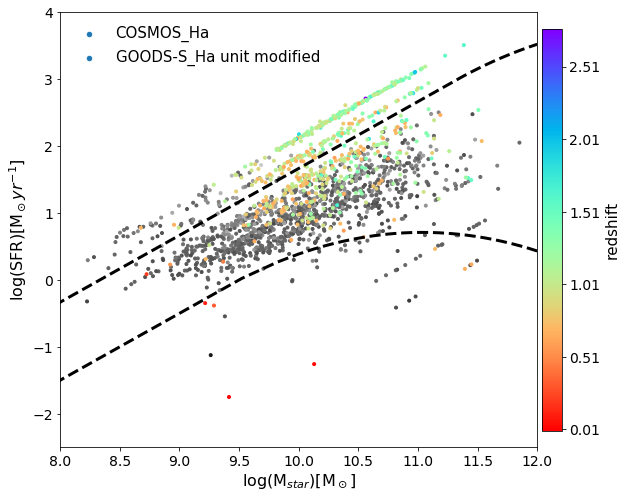

In [62]:
#===================================================================================================================
'''SFR versus stellar mass'''
#===================================================================================================================

M_star = np.linspace(10**2, 10**13, 3e3)

plt.figure(figsize = (9, 8))
plt.scatter(np.log10(cosmos_ha['bayes.stellar.m_star']), np.log10(cosmos_ha['best.sfh.sfr']), marker = '.',\
           c = cosmos_ha['best.universe.redshift'], label ='COSMOS_Ha', cmap = plt.cm.Greys_r)
# plt.scatter(np.log10(goodss_ha['bayes.stellar.m_star']), np.log10(goodss_ha['best.sfh.sfr']), marker = '.', \
#            c = goodss_ha['best.universe.redshift'], label = 'GOODS-S_Ha', cmap = plt.cm.plasma_r)
plt.scatter(np.log10(goodss_ha_new['bayes.stellar.m_star']), np.log10(goodss_ha_new['best.sfh.sfr']), marker = '.', \
           c = goodss_ha_new['best.universe.redshift'], label = 'GOODS-S_Ha unit modified', cmap = plt.cm.rainbow_r)
plt.plot(np.log10(M_star), MS(0.01, M_star), linestyle = '--', linewidth = 3.0, c = 'k')
plt.plot(np.log10(M_star), MS(5 ,M_star), linestyle = '--', linewidth = 3.0, c = 'k')
# plt.xlim(3, 11.7)
# plt.xlim(3, 12)
# plt.ylim(-8, 3)
plt.xlim(8, 12)
plt.ylim(-2.5, 4)
plt.xlabel(r'log(M$_{star}$)[M$_\odot$]', fontsize = 16)
plt.ylabel(r'log(SFR)[M$_\odot yr^{-1}$]', fontsize = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.5 , loc = 'upper left')
cb = plt.colorbar(ticks = np.arange(0.01, 5, 0.5), fraction = 0.04, pad = 0.01)
cb.set_label(label = 'redshift', size = 15)
cb.ax.tick_params(labelsize = 14)